# \[GNN\] Graph Basic

김보람  
2023-07-18

# ref

-   [Boostcourse](https://www.boostcourse.org/ai211/joinLectures/324261?isDesc=false)

-   https://kijungs.github.io/

# 1. 정점 표현 학습

`-` 그래프의 정점(Node)를 벡터의 형태로 표현으로 정점 임베딩(Node
Embedding)이라고도 부른다.

-   입력: 그래프

-   출력: 정점 u에 대한 임베딩, 즉 벡터 표현 $z_u$가 출력

-   그래프에서 정점간 유사도를 임베딩 공간에서도 보존하는 것을 목표로 함

`-` 유사도

-   인접성/거리/경로/중첩/임의보행 기반 접근법

$$similarity(u,v) \approx z_v^Tz_u$$

`-` 변환식(Transductive) 방법

-   학습의 결과로 정점의 임베딩 자체를 얻는다.

-   한계1: 학습이 진행된 이후에 추가된 정점에 대해서 임베딩을 얻을 수
    없다.

-   한계2: 모든 정점에 대한 임베딩을 미리 계산해 저장해 두어야 한다.

-   한계3: 정점이 속성(Attribute) 정보를 가진 경우에 활용이 어렵다.

`-` 귀납식(Inductive) 방법

-   정점을 임베딩으로 변환시키는 함수 $\to$ 인코더를 얻는다.

$$ENC(v) = z_v$$

-   장점1: 학습이 진행된 이후에 추가된 정점에 대해서 임베딩을 얻을 수
    있다.

-   장점2: 모든 정점에 대한 임베딩을 미리 계산해 저장해 둘 필요가 없다

-   장점3: 정점이 속성(Attribute) 정보를 가진 경우에 활용할 수 있다.

-   GNN: 대표적인 귀납식 임베딩 방법

# 2. 그래프 신경망

## 구조

이웃 정점들의 정보를 집계하는 과정을 반복하여 임베딩을 얻는다.

층(Layer)마다 임베딩을 얻는다.

각 층에서는 이웃들의 이전 층 임베딩을 집계하여 새로운 임베딩을 얻는다.

`-` 집계 함수

-   이웃들 정보의 평균 계산

-   신경망에 적용

$$h_v^0 = x_v$$

$$h_v^k = \sigma \left( W_k \sum_{u \in N(v)} \frac{h_u^{k-1}}{|N(v)|} + B_kh_v^{k-1} \right), \forall k >0$$

$h_v^0 = x_v$: 0번 층에서 정점 v의 임베딩으로 정점 v의 속성 벡터로
초기화

$h_v^k$: 현재 층, 즉 k번 층에서 정점 v의 임베딩

$\sigma$: 비선형 함수(ReLU, tanh 등)

$\sum_{u \in N(v)} \frac{h_u^{k-1}}{|N(v)|}$: 이전 층에서 이웃들의
임베딩에 대한 평균 계산

$h_v^{k-1}$: 이전 층에서 정점 v의 임베딩

-   마지막 층에서 정점 별 임베딩이 해당 정점의 출력 임베딩

`-` 한계: 이웃들의 정보를 동일한 가중치로 평균을 낸다.

## 학습

`-` 학습 변수(Trainable Parameter)는 층 별 신경망의 가중치

-   $W_k, B_k$: 학습 변수

`-` 손실함수 결정: 정점간 거리 보존하는 것 목표

인접성 기반 유사도 정의 $\to$ 손실 함수

$${\cal L} = \sum_{(u,v) \in V \times V} ||z_u^Tz_v - A_{u,v}||^2$$

$\cal L$: 비용함수

$\sum_{(u,v) \in V \times V}$:모든 정점 쌍에 대하여 합산

$z_u^Tz_v$: 임베딩 공간에서의 유사도

$A$: 그래프에서의 유사도

-   위의 내용은 분류를 하기 위한 전 단계이며, 분류(Classfier)를 하기
    위한 손실함수는 따로 있음.

$\to$ 후속 과제(Downstream Task)의 손실함수를 이용한
**종단종(End-to-End) 학습**도 가능

분류기의 손실함수, 예를 들어 교차 엔트로피(Cross-Entropy)를, 전체
프로세스의 손실함수로 사용하여 종단종 학습을 할 수 있다.

$${\cal L} = \sum_{v \in V} y_v log(\sigma(z_v^T \theta)) + (1-y_v)log(1-\sigma(z_v^T \theta))$$

$y_v$: 정점의 실제 유형(0 혹은 1)

$z_v^T$: 정점의 임베딩

$\theta$: 분류기의 학습 변수

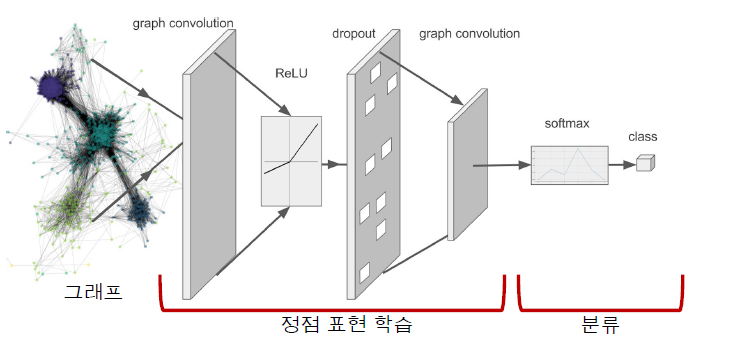

-   변환적 정점 임베딩 이후에 별도의 분류기를 학습하는 것보다 정확도가
    대체로 높다.

-   학습에 사용할 대상 정점을 결정하여 학습 데이터를 구성한다.

-   오차역전파(Backpropagation)을 통해 손실함수를 최소화한다. 신경망의
    학습 변수를 학습한다.

-   학습된 신경망을 적용해, 학습에 사용되지 않은 정점의 임베딩을 얻는다.

## 활용

-   학습 이후에 추가된 정점의 임베딩을 얻는다.

EX) 온라인 소셜네트워크 등 실제 그래프들은 시간에 따라서 변화한다.

-   학습된 그래프 신경망을, 새로운 그래프에 적용한다.

# 3. 그래프 신경망 변형

## 그래프 합성곱 신경망

`-` 집계함수

$$h_v^0 = x_v$$

$$h_b^k = \sigma \left( W_k \sum_{u \in N(v) \cup v} \frac{h_u^{k-1}}{\sqrt{|N(u)||N(v)|}} \right), \forall k \in \{1, \dots, K \}$$

$$z_v = h_v^K$$

-   기존 집계 함수와 비교 했을 때 정규화 방법이 변화되었고, 동일 신경망
    사용으로 학습 변수를 공유한다.

`-` 한계: 단순히 연결성을 고려한 가중치로 평균을 낸다.

## GraphSAGE

`-` 집계함수

-   이웃들의 임베딩 AGG 함수를 이용해 합치고 자신의 임베딩과
    연결(Concatenation)

$$h_v^k = \sigma([W_k \cdot \text{AGG} (\{h_u^{k-1}, \forall u \in N(v)\}), B_kh_v^{k-1}])$$

`-` AGG 함수

-   MEAN: AGG = $\sum_{u \in N(v)} \frac{h_u^{k-1}}{|N(v)|}$

-   Pool: AGG = $\gamma(\{\text{Q}h_u^{k-1}, \forall u \in N(v)\})$

$\gamma$: 원소별 최대

-   LSTM: AGG = $\text{LSTM}([h_u^{k-1}, \forall u \in \pi(N(v))])$

# 4. 합성곱 신경망과의 비교

`-` 합성곱 신경망과 그래프 신경망의 유사성

-   모두 이웃의 정보를 집계하는 과정 반복

-   GCN은 이웃 픽셀의 정보를 집계하는 과정 반복

`-` 합성곱 신경망과 그래프 신경망의 차이

-   GCN은 이웃의 수가 균일하지만 그래프 신경망은 정점 별로 집계하는
    이웃의 수가 다르다.

`-` 그래프에는 합성곱 신경망이 아닌 그래프 신경망을 적용해야 한다.

-   합성곱 신경망이 주로 쓰이는 이미지는 인접 픽셀이 유용한 정보를 담고
    있을 가능성이 높다.

-   그래프의 인접 행렬에서의 인접 원소는 제한된 정보를 가지며 인접
    행렬의 행, 열의 순서는 임의로 결정되는 경우가 많다.

# 5. 그래프 어텐션 신경망

Graph Attention Networ, GAT: 가중치 자체도 학습

실제 그래프에서 이웃 별로 미치는 영향이 다를 수 있기 때문에 가중치를
학습하기 위해서 셀프-어텐션(Self-Attention) 사용

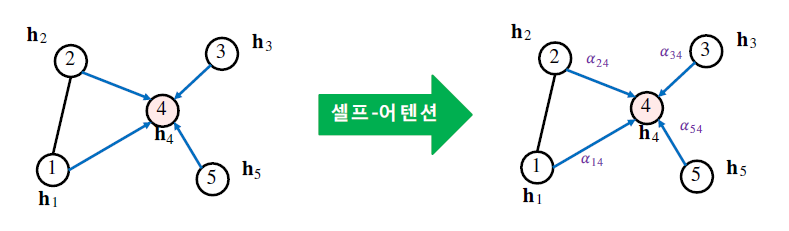

`-` 각 층에서 정점 $i$로부터 이웃 $j$로의 가중치 $a_{ij}$ 계산법

`1` 해당 층의 정점 $i$의 임베딩 $h_k$에 신경망 $W$를 곱해 새로운
임베딩을 얻는다.

$\tilde h_i = h_i W$

`2` 정점 $i$와 $j$의 새로운 임베딩을 연결한 후, 어텐션 계수 $a$를
내적한다. $a$는 모든 정점이 공유하는 학습 변수이다.

$e_{ij} = a^T [\text{CONCAT}(\tilde h_i, \tilde h_j)]$

`3` 2의 결과에 소프트맥스를 적용한다.

$a_{ij} = \text{softmax}_j(e_{ij}) = \frac{\text{exp}(e_{ij})}{\sum_{K \in N_i} \text{exp}(e_{iK})}$

여러 개의 어텐션을 동시에 학습한 뒤, 결과를 연결하여 사용 $\to$ 멀티헤드
어텐션(Multi-head Attention)

$$h_i' = \text{CONCAT}_{1 \leq k \leq K} \sigma \left( \sum_{j \in N_i} a_{ij}^k h_j W_k \right)$$

-   어텐션의 결과 정점 분류의 정확도가 향상

# 6. 그래프 표현 학습, 그래프 임베딩, 획일화 문제

`-` 표현 학습, 임베딩

-   그래프 전체를 벡터의 형태로 표현

-   그래프 임베딩은 벡터의 형태로 표현된 그래프 자체를 의미하기도 하며
    그래프 분류 등에 활용

-   그래프 풀링(Graph Pooling): 정점 임베딩들로부터 그래프 임베딩을 얻는
    과정

`-` 지나친 획일화

-   지나친 획일화(Over-smoothing) 문제: 그래프 신경망의 층의 수가
    증가하면서 정점으 ㅣ임베딩이 서로 유사해지는 현상으로 적은 수의
    층으로도 다수의 정점에 의해 영향을 받는다.

-   그래프 신경망의 층의 수를 늘렸을 때 후속 과제에서 정확도가 감소하는
    현상 발견

-   대응: JK네트워크(Jumping Knowledge Network)는 마지막 층의
    임메딩+모든 층의 임베딩 함께 사용